**PGR: Plan de Gestion de Residuos - Herramienta de Visualizacion y Analisis**

In [ ]:
import pandas as pd
import numpy as np


***DATAFRAMES POR MATERIAL***

Se leen las planillas de la obra, se sacan datos de cantidades, nombre de la obra, año mínimo y máximo.

Obs: Para la categoría "Suelos", el registro de hizo en unidades volumétricas (m3). Para igualar todas las cantidades en kilogramos, se aplica la densidad de 1100kg/m3.


In [170]:
pgr_metal = pd.DataFrame(pd.read_excel('Planilla_residuosA.xlsx',sheet_name='Metal',usecols=['FECHA','ORIGEN','UNIDAD','CANTIDAD']))
pgr_pet = pd.DataFrame(pd.read_excel('Planilla_residuosA.xlsx',sheet_name='Petreo',usecols=['FECHA','ORIGEN','UNIDAD','CANTIDAD']))
pgr_madera = pd.DataFrame(pd.read_excel('Planilla_residuosA.xlsx',sheet_name='Maderas',usecols=['FECHA','ORIGEN','UNIDAD','CANTIDAD']))
pgr_plast = pd.DataFrame(pd.read_excel('Planilla_residuosA.xlsx',sheet_name='Plasticos',usecols=['FECHA','ORIGEN','UNIDAD','CANTIDAD']))
pgr_nonrec = pd.DataFrame(pd.read_excel('Planilla_residuosA.xlsx',sheet_name='No Reciclable',usecols=['FECHA','ORIGEN','UNIDAD','CANTIDAD']))
pgr_papel = pd.DataFrame(pd.read_excel('Planilla_residuosA.xlsx',sheet_name='Papeles y Cartones',usecols=['FECHA','ORIGEN','UNIDAD','CANTIDAD']))
pgr_pelig = pd.DataFrame(pd.read_excel('Planilla_residuosA.xlsx',sheet_name='Peligrosos',usecols=['FECHA','ORIGEN','UNIDAD','CANTIDAD']))
pgr_suelo = pd.DataFrame(pd.read_excel('Planilla_residuosA.xlsx',sheet_name='Suelo',usecols=['FECHA','ORIGEN','UNIDAD','CANTIDAD']))
pgr_vidrio = pd.DataFrame(pd.read_excel('Planilla_residuosA.xlsx',sheet_name='Vidrio',usecols=['FECHA','ORIGEN','UNIDAD','CANTIDAD']))

fac_suelo = 1100

pgr_suelo.loc[:,'CANTIDAD'] = pgr_suelo['CANTIDAD']*fac_suelo #De todos los registros de suelo, se selecciona la columna de Cantidad

pgr_total = pd.concat([pgr_metal,pgr_pet,pgr_madera,pgr_plast,pgr_nonrec,pgr_papel,pgr_pelig,pgr_suelo,pgr_vidrio])
pgr_total['FECHA'] = pd.to_datetime(pgr_total['FECHA'],errors = 'coerce')
pgr_total['FECHA'] = pgr_total['FECHA'].fillna(pd.Timestamp('2024-01-01'))

categorias = ['Metal','Petreos','Maderas','Plásticos','No reciclable','Papel y Cartón','Peligrosos','Suelo','Vidrio']

obra = pgr_metal.loc[0,'ORIGEN']
min_año = pgr_total['FECHA'].dt.year.min()
max_año = pgr_total['FECHA'].dt.year.max()

#['FECHA', 'TICKET N', 'DESCRIPCION DE MATERIAL', 'ORIGEN', 'DESTINO',
   #    'UNIDAD', 'CANTIDAD', 'RETIRADO POR']


C:\Users\HP\AppData\Local\Temp\ipykernel_9148\1483716914.py:15: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



***TOTALES***



In [173]:




#pgr_total = pd.concat([pgr_metal,pgr_pet,pgr_madera,pgr_plast,pgr_nonrec,pgr_papel,pgr_pelig,pgr_suelo,pgr_vidrio])

#total = pgr_total['CANTIDAD'].sum()

datasets = [pgr_metal.loc[['FECHA'].dt.year==min_año],pgr_pet,pgr_madera,pgr_plast,pgr_nonrec,pgr_papel,pgr_pelig,pgr_suelo,pgr_vidrio]

totales_pgr = [df['CANTIDAD'].sum() for df in datasets]

datasets


AttributeError: 'list' object has no attribute 'dt'

In [158]:
#pgr_total.set_index('FECHA', inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

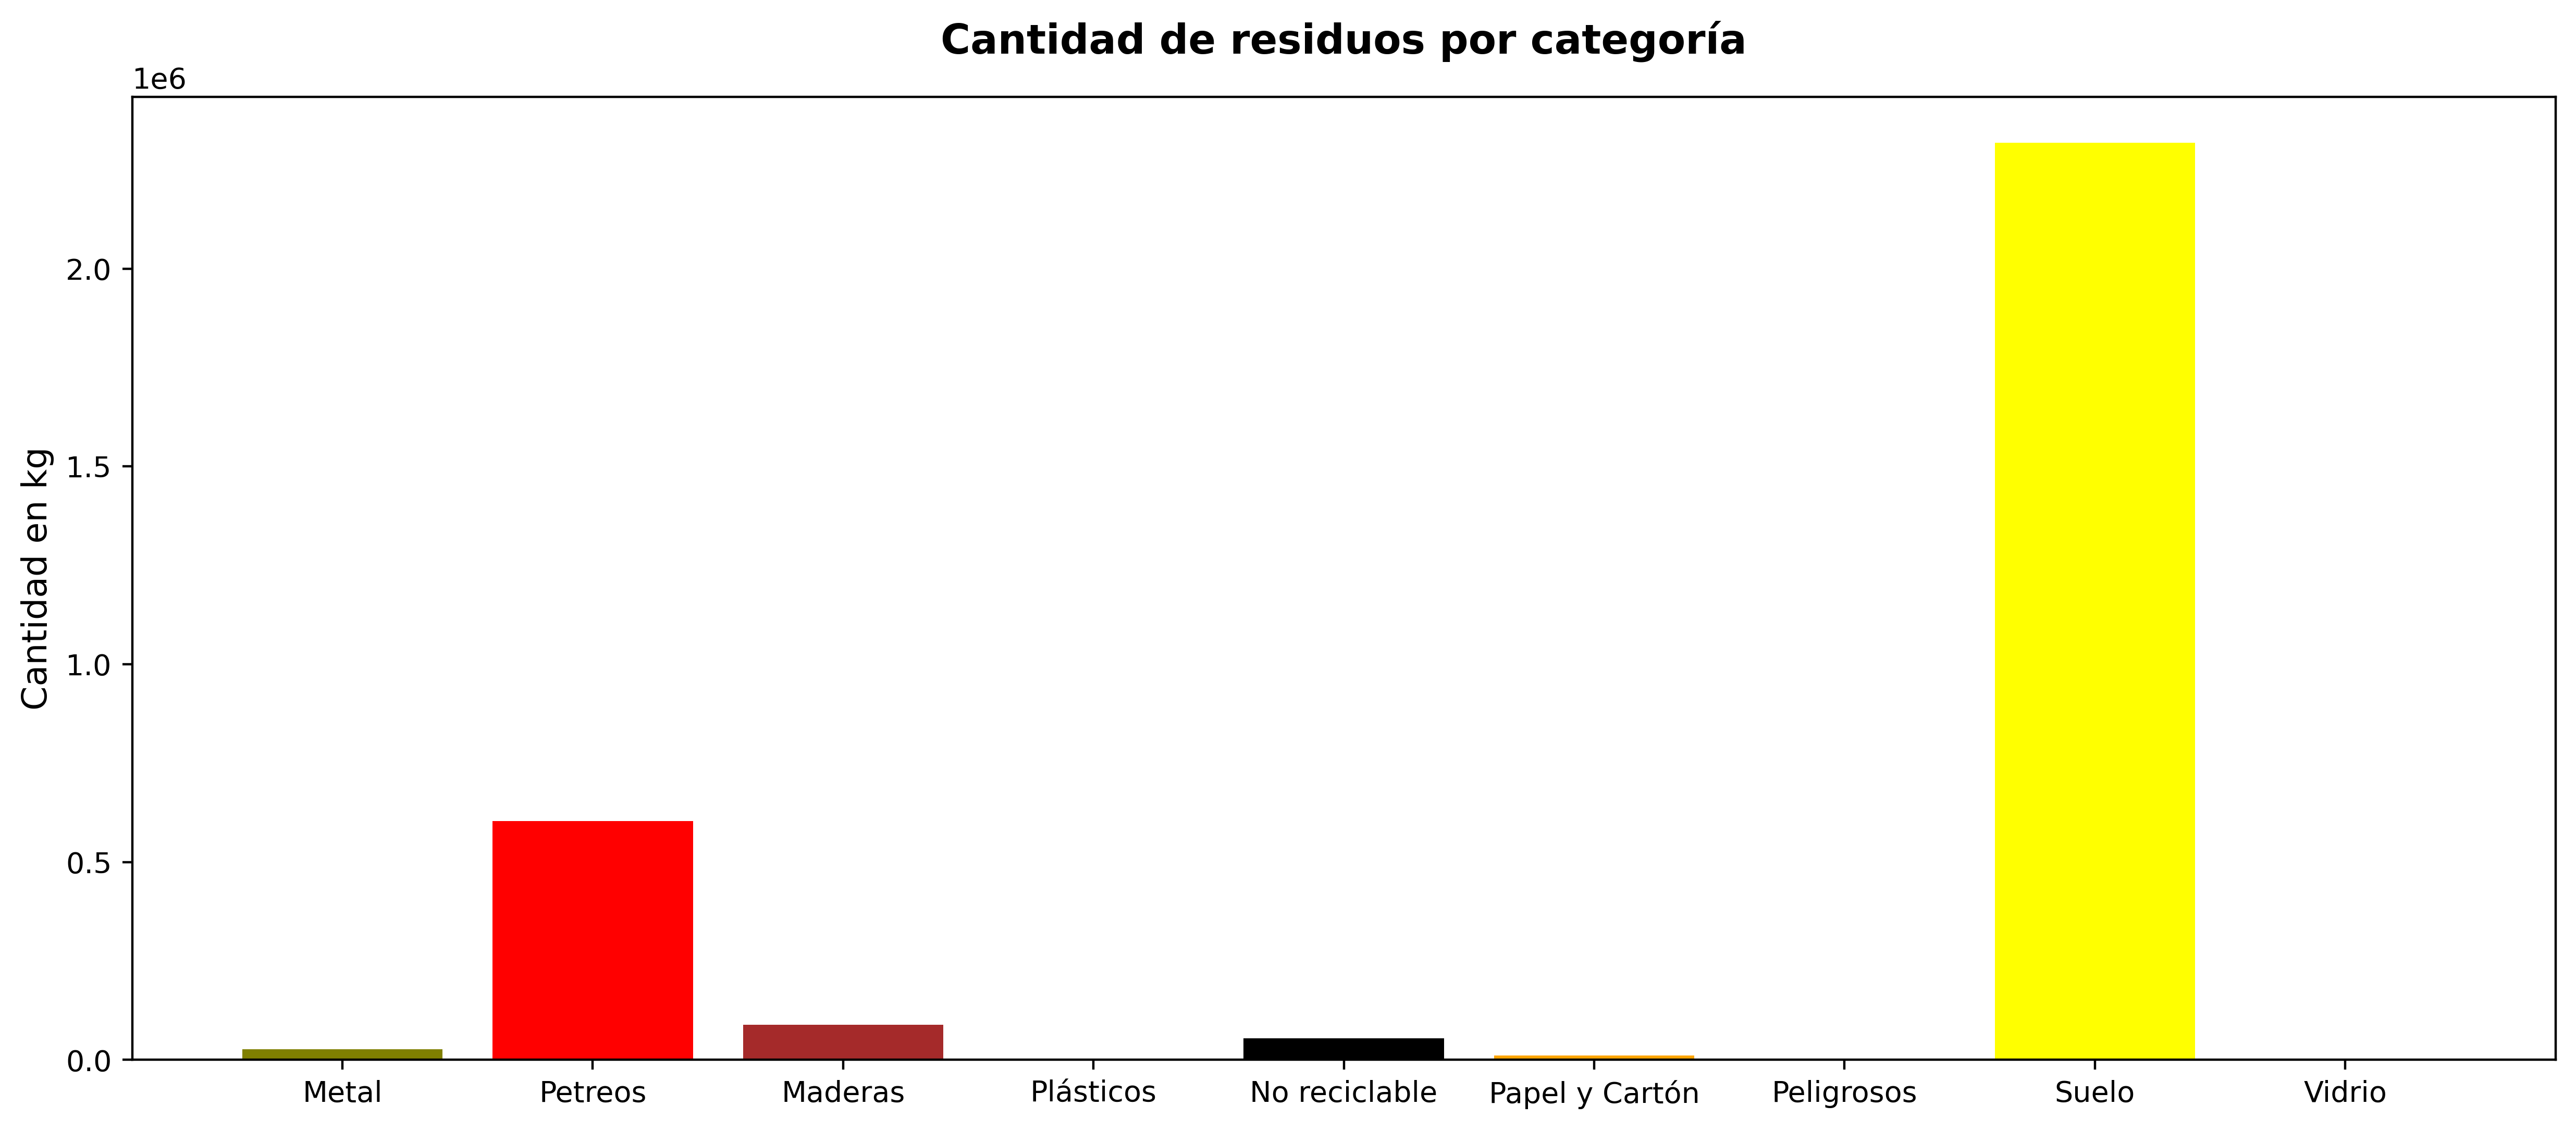

In [159]:
import matplotlib.pyplot as plt

plt.close('all')

fig, ax = plt.subplots(figsize=(15,6),dpi=400)

ax.bar(
    categorias,
    totales_pgr,
    color = ['olive','red','brown','blue','black','orange','cyan','yellow','purple']
     )
ax.set_title('Cantidad de residuos por categoría' ,fontsize=14, fontweight='bold', pad=15)
ax.set_ylabel('Cantidad en kg', fontsize=12)

plt.show

In [160]:
import plotly.express as px
bd = pd.DataFrame({'Categorias':categorias, 'Cantidad': totales_pgr})

fig1 = px.bar(
    bd,
    x='Categorias',
    y='Cantidad',
    color = 'Categorias',
    title = 'Total residuos recoletados en la obra',
    subtitle=f'Obra: {obra}({min_año}-{max_año})',
    labels = {'Cantidad': 'Recolectado (Kg)'},
    template='plotly_white'
)

fig1.show()

In [161]:
fig1.write_html('Barras.html', include_plotlyjs='cdn')


**Cantidades por año**

Análisis de recolección en el primer y último año de registros.

In [ ]:
totales_pgr_min = [df.loc[['FECHA'].dt.year==min_año, 'CANTIDAD'].sum() for df in datasets]



bd_min = pd.DataFrame({'Categorias':categorias, 'Cantidad': totales_pgr})

AttributeError: 'list' object has no attribute 'pgr_total'

***Cantidades de recuperación***

In [165]:
'''Elaboramos una lista que sume los materiales reciclables y los no reciclables
*Reciclables:
-Metal
-Pétreos
-Maderas
-Plásticos
-Papel y cartón
-Suelos
-Vidrios

*No Reciclables:
-Peligrosos
-No reciclables

'''

categorias_rec = ['Metal','Petreos','Maderas','Plásticos','No reciclable','Papel y Cartón','Peligrosos','Suelo','Vidrio']
categorias_nonrec = ['No reciclable','Peligrosos']

rec_total = bd.loc[bd['Categorias'].isin(categorias_rec),'Cantidad'].sum() #Kilogramos de resiudos reciclables
nonrec_total = bd.loc[bd['Categorias'].isin(categorias_nonrec),'Cantidad'].sum()# Kilogramos de resiudos no reciclables


bd_rec = pd.DataFrame({'Tipo':['Reciclable','No Reciclable'],'Cantidad':[rec_total,nonrec_total]})


fig3 = px.pie(
    bd_rec,
    values='Cantidad',
    names='Tipo',
    labels='lala',
    title='Porcentaje de Recuperación de Residuos',
    subtitle=f'Obra: {obra}({min_año}-{max_año})',
    template='plotly_white',
    hole=0.5  # Donut chart (0 = pie completo, 0.5 = donut grande)
)

fig3.update_traces(
    textposition='outside',
    textinfo='percent+label',  # Muestra porcentaje y nombre
    hovertemplate='<b>%{label}</b><br>%{value:,.0f} Kg<br>%{percent}<extra></extra>',
    pull=[0.05, 0]
)

fig3.update_layout(
    uniformtext_minsize=12,
    margin=dict(t=50, b=50, l=50, r=50)
)
fig3.update

fig3.show()

In [166]:
fig3.write_html('Torta.html', include_plotlyjs='cdn')


**RESUMIR EN UNA TABLA**

Presentamos los resultados de forma breve, con los ahorros ambientale asociados a la gestión de residuos.

In [167]:
#df = pd.DataFrame(datos,indices,columnas)